Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Prelim Examination**
**Name** | Catorce, Mayah Mae A.
         | Naga, Jamal
**Section** | CPE32S3
**Date Performed**: |March 1, 2024
**Date Submitted**: |March 6, 2024
**Instructor**: | Engr. Roman Richard

<hr>

Choose any dataset applicable for classification and/or prediction analysis problems.

Show the application of the following algorithms:

** Linear Regression:**

**- Singular LR**

**- Multiple LR**

**- Polynomial LR**

**Logistic Regression**

**Decision Tree**

**Random Forest**

Provide Evaluation reports for all models


NOTE: Submit the github link that contains all files (pdf report, dataset and python notebooks).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


compFrame = pd.read_csv("/content/Advertising.csv")

In [ ]:
# Display the information about the DataFrame
compFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Display first 5 rows
compFrame.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [ ]:
# Display the summary statistics of the DataFrame
compFrame.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

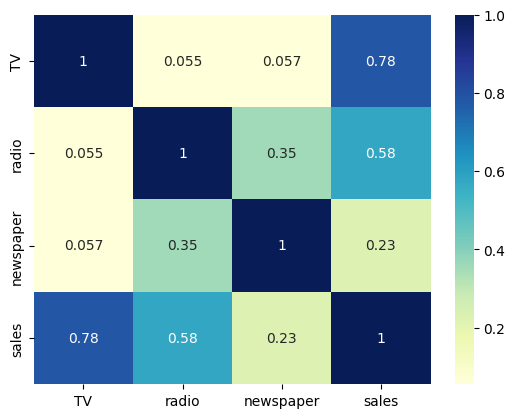

In [ ]:
# Create a heatmap of the correlation matrix
sns.heatmap(compFrame.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
# Calculate the correlation coefficients between the 'sales' column and all other columns in the DataFrame
compFrame.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

---
---
#**1. Singular Linear Regression**
---
---

Predicting sales revenue based on advertising spending through TV.

Coefficients:  [0.04600779]
Predicted sales revenue when advertising spend on TV is 500: 30.296388575067947
Mean Squared Error:  10.18618193453022
R-squared:  0.6763151577939721


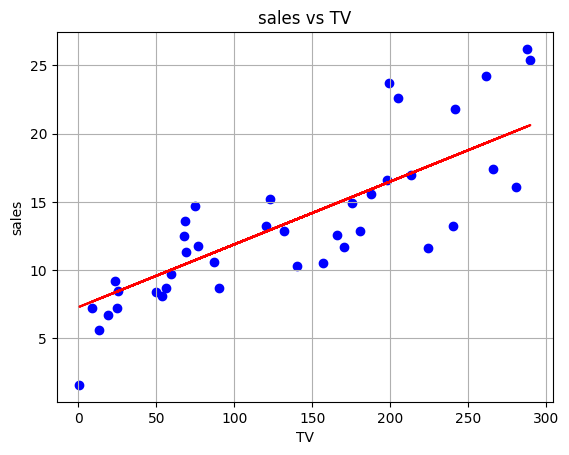

In [ ]:
# Select independent and dependent variable
X = compFrame[['TV']]
y = compFrame['sales']

# Split the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

# Fitting Singular Linear Regression to the Training set
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficient value
print("Coefficients: ", model.coef_)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Get the Mean Squared Error result
mse=mean_squared_error(y_test, y_pred)

# Get the R2_Score
r2 = r2_score(y_test, y_pred)

# Creating a DataFrame
new_data = pd.DataFrame({'TV': [500]})

# Making prediction using the trained model
predicted_sales = model.predict(new_data)

print("Predicted sales revenue when advertising spend on TV is 500:", predicted_sales[0])

print('Mean Squared Error: ', mse) # If the result is small values the model is better
print('R-squared: ', r2) # If the result is closer to 1 the model is better
plt.scatter(X_test,y_test, color = 'b')
plt.plot(X_test,y_pred, color = 'r')
plt.title('sales vs TV')
plt.xlabel('TV')
plt.ylabel('sales')
plt.grid(True)

**Model Evaluation**


- Having a coefficients of 0.046 we can say that for every additional spent on TV advertising, we expect sales revenue to increase by about 0.046.
- Having a mean squared error of 10.18 where it indicates that, on average, the squared difference between the actual and predicted sales revenue values is about 10.186. But it says that if the value is closer to 1 it indicates better model performance.
- Having a r squared of 0.67 where model explains that approximately 67% of the variation in sales revenue based on TV spending alone.
- Based of the result we can conclude that there is a positive relationship between TV spending and sales revenue.







---
---
#**2. Multiple Linear Regression**
---
---



Predicting sales revenue based on advertising spending through media such as
TV, radio, and newspaper.

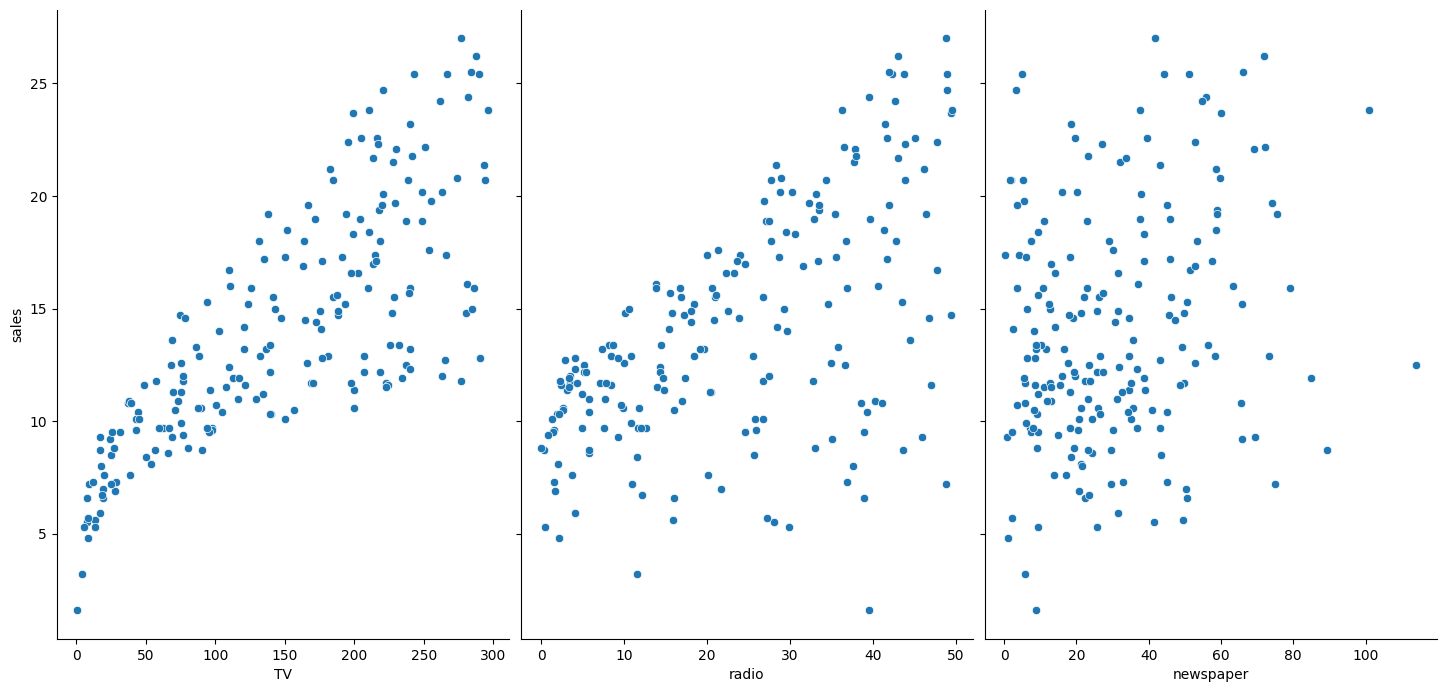

In [ ]:
#Relationship between Features and Response
sns.pairplot(compFrame, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

Coefficient :  [ 0.04458402  0.19649703 -0.00278146]
R2_Score:  0.9067114990146383
MSE Score:  4.402118291449685
Predicted sales revenue when advertising spend on TV is 50, radio is 30, and newspaper is 20: 11.063375781517173


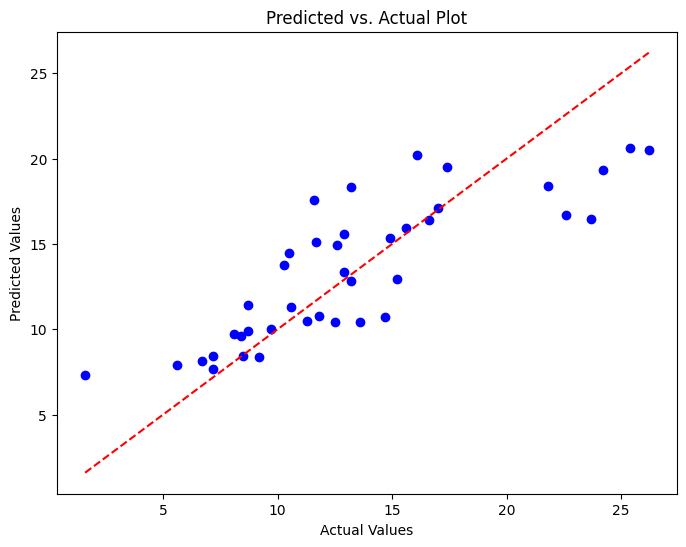

In [ ]:
# Select independent and dependent variable
X = compFrame[['TV','radio', 'newspaper']]
y = compFrame['sales']

# Split the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Singular Linear Regression to the Train set
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficient value
print('Coefficient : ', model.coef_)

# Predicting the Train set results
y_pred_train = model.predict(X_train)

# Get the R2_Score
r2 = r2_score(y_train, y_pred_train)
print('R2_Score: ', r2)

# Predicting the Test set results
y_pred_test = model.predict(X_test)

# # Get the Mean Squared Error result
mse = mean_squared_error(y_test,y_pred_test)
print('MSE Score: ', mse)

# Creating a DataFrame
new_data = pd.DataFrame({'TV': [50], 'radio': [30], 'newspaper': [20]})

# Making prediction using the trained model
predicted_sales = model.predict(new_data)

print("Predicted sales revenue when advertising spend on TV is 50, radio is 30, and newspaper is 20:", predicted_sales[0])

# Predicted vs. Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='r')
plt.title('Predicted vs. Actual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

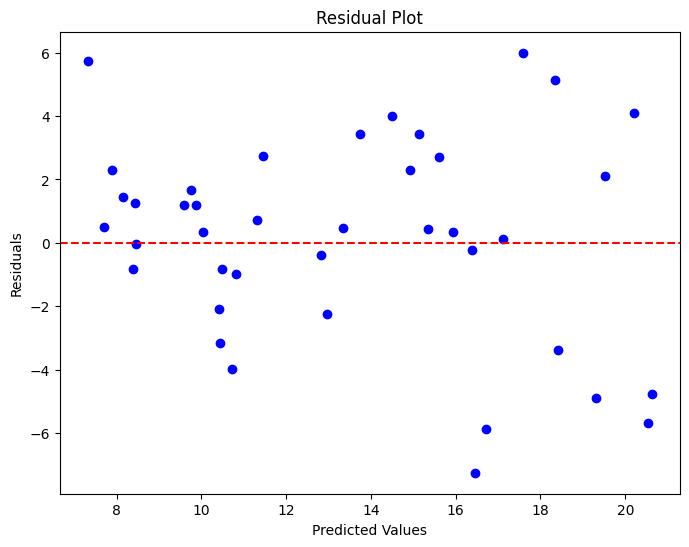

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_pred - y_test, color='blue')
plt.axhline(y=0,  linestyle='--', color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Model Evaluation**<br>
- Having a coefficient values of [ 0.04458402  0.19649703 -0.00278146], in the first and second variable it has positive relationship since it has positive coefficient, while in the third  variable  it has negative relationship since the ouput is negative coefficient.
- Having a r squared of 0.90 that is approximately 90% of the variability in the dependent variable is explained by the independent variables included in the model.
- Having a mean squared error of 4.40 we can that the Multiple Linear Regression model we can say that it is better than the linear regression model since it give a lower values that is more closer to 1.
- We conclude, based on the provided coefficients, R-squared score, and MSE score, Multiple Linear Regression model appears to perform well.


---
---
#**3. Polynomial Regression**
---
---

Predicting sales revenue based on advertising spending through TV using polynomial regression.

Mean Squared Error for SLR: 10.18618193453022
R2 Score for SLR: 0.6763151577939721
Mean Squared Error for PLR: 10.685507926293392
R2 Score for PLR: 0.660448147378093
Coefficients:  [ 0.          6.14894143 -2.32734841]
Intercept:  14.217500000000005
predict sales revenue when advertising spend on TV is 50: 9.592883253710221


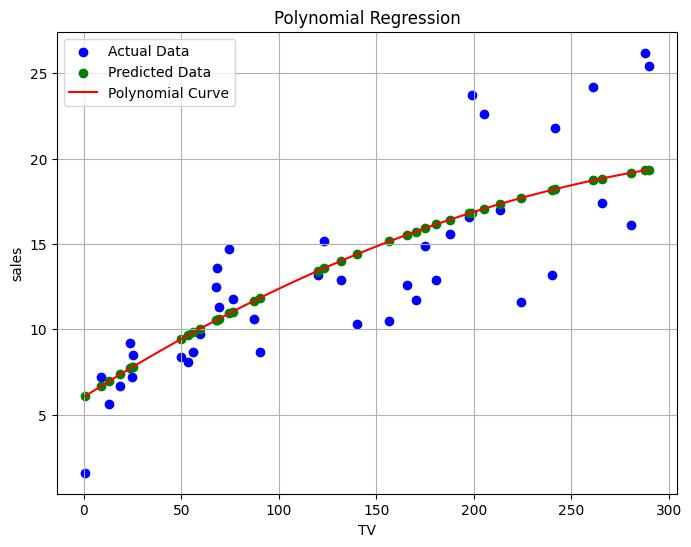

In [ ]:
# Select independent and dependent variable
X = compFrame[['TV']]
y = compFrame['sales']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply PolynomialFeatures before scaling
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_poly_train)
X_test_scaler = scaler.transform(X_poly_test)

# Train Singular Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_simple = model.predict(X_test)

# Calculate MSE and R2 score for Singular Linear Regression
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

# Train Polynomial Linear Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_scaler, y_train)
y_pred = poly_model.predict(X_test_scaler)

# Calculate MSE and R2 score for Polynomial Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Compare MSE and R2 score between PLR model and Simple Linear Regression model
print("Mean Squared Error for SLR:", mse_simple)
print("R2 Score for SLR:", r2_simple)
print("Mean Squared Error for PLR:", mse)
print("R2 Score for PLR:", r2)

# Get the coefficient value
print("Coefficients: ", poly_model.coef_)

# Get the intercept value
print('Intercept: ', poly_model.intercept_)

# Creating a DataFrame with a single data point for R&D Spend
new_data = pd.DataFrame({'TV': [50]})

# Making prediction using the trained model
predicted_sales = model.predict(new_data)

print("predict sales revenue when advertising spend on TV is 50:", predicted_sales[0])

# Plotting the Polynomial Curve
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='b', label='Actual Data')
plt.scatter(X_test, y_pred, color='g', label='Predicted Data')
x_values = np.linspace(min(X_test.values), max(X_test.values), 100).reshape(-1, 1)
x_poly_values = poly.transform(x_values)
x_poly_values_scaled = scaler.transform(x_poly_values)
y_poly_pred = poly_model.predict(x_poly_values_scaled)
plt.plot(x_values, y_poly_pred, color='r', label='Polynomial Curve')
plt.title('Polynomial Regression')
plt.xlabel('TV')
plt.ylabel('sales')
plt.legend()
plt.grid(True)
plt.show()

**Model Evaluation**
- As seen in the plotted graph we can say that Polynomial curve overlaid on the acutal and predicted data points, it shows that PLR model capture the underlying trend in the data reasonably well. In the graph PLR model can capture nonlinear relationships between the TV as an independent variable and sales as depedent variable. Also, it suggest that in capturing complex relationship between TV and sales PLR model is more suitable.




---
---
# Logistic, Decision Tree, and Random Forest Regressions
---
---
The first 28 cells are dedicated for data understanding, cleaning, and splitting.

In [ ]:
#Step 1: Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Step 2: Load the Dataset
diaFrame = pd.read_csv('/content/diabetes.csv')

In [ ]:
#Step 3: Understanding the Variables

#3.1.1 - Head of the Dataset
diaFrame.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
diaFrame.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
diaFrame.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
310            6       80             66             30        0  26.2   
231            6      134             80             37      370  46.2   
520            2       68             70             32       66  25.0   
228            4      197             70             39      744  36.7   
238            9      164             84             21        0  30.8   

     DiabetesPedigreeFunction  Age  Outcome  
310                     0.313   41        0  
231                     0.238   46        1  
520                     0.187   25        0  
228                     2.329   31        0  
238                     0.831   32        1

In [ ]:
#3.1.2 - Shape of the Dataset
diaFrame.shape

(768, 9)

In [ ]:
#3.1.3 - Type of the Dataset
diaFrame.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#3.1.4 - Info of the Dataset
diaFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#3.1.5 - Summary of the Dataset
diaFrame.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

By outputting the summary of the dataset, we can notice that the minimum values of the features for Pregnancy up to BMI has 0 values.

In [ ]:
#3.2 - Data Cleaning
#3.2.1 - Drop the Duplicates
#Check first if there are any duplicates
diaFrame.shape

(768, 9)

In [ ]:
diaFrame = diaFrame.drop_duplicates()

In [ ]:
diaFrame.shape

(768, 9)

We can observe that there were no changes on the shape of the dataset, this only meaens that there were no duplicates on the dataset.

In [ ]:
#3.2.2 - Check the NULL Values
diaFrame.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The values are all 0, which means there is no NULL value in the dataset.

In [ ]:
diaFrame.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Check the number of Zero values in the dataset
print('No. of zero values in Glucose ', diaFrame[diaFrame['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure ', diaFrame[diaFrame['BloodPressure']==0].shape[0])
print('No. of zero values in Insulin ', diaFrame[diaFrame['Insulin']==0].shape[0])
print('No. of zero values in SkinThickness ', diaFrame[diaFrame['SkinThickness']==0].shape[0])
print('No. of zero values in BMI ', diaFrame[diaFrame['BMI']==0].shape[0])

No. of zero values in Glucose  5
No. of zero values in BloodPressure  35
No. of zero values in Insulin  374
No. of zero values in SkinThickness  227
No. of zero values in BMI  11


In [ ]:
#Replace number of zero values with mean of that columns
diaFrame['Glucose']=diaFrame['Glucose'].replace(0,diaFrame['Glucose'].mean())
diaFrame['BloodPressure']=diaFrame['BloodPressure'].replace(0,diaFrame['BloodPressure'].mean())
diaFrame['SkinThickness']=diaFrame['SkinThickness'].replace(0,diaFrame['SkinThickness'].mean())
diaFrame['Insulin']=diaFrame['Insulin'].replace(0,diaFrame['Insulin'].mean())
diaFrame['BMI']=diaFrame['BMI'].replace(0,diaFrame['BMI'].mean())

In [ ]:
diaFrame.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Negative (0) =  500
Positive (1) =  268


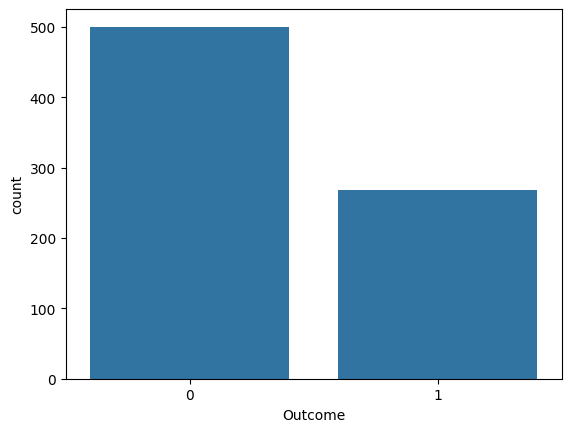

In [ ]:
#create pie chart
sns.countplot(x='Outcome',data=diaFrame)
N,P = diaFrame['Outcome'].value_counts()
print("Negative (0) = ", N)
print("Positive (1) = ", P)

We can imply from this countplot generated from outcome that there is a greater population who doesn't have diabetes (0 value on outcome) than diabetes positive persons (1 value on outcome).

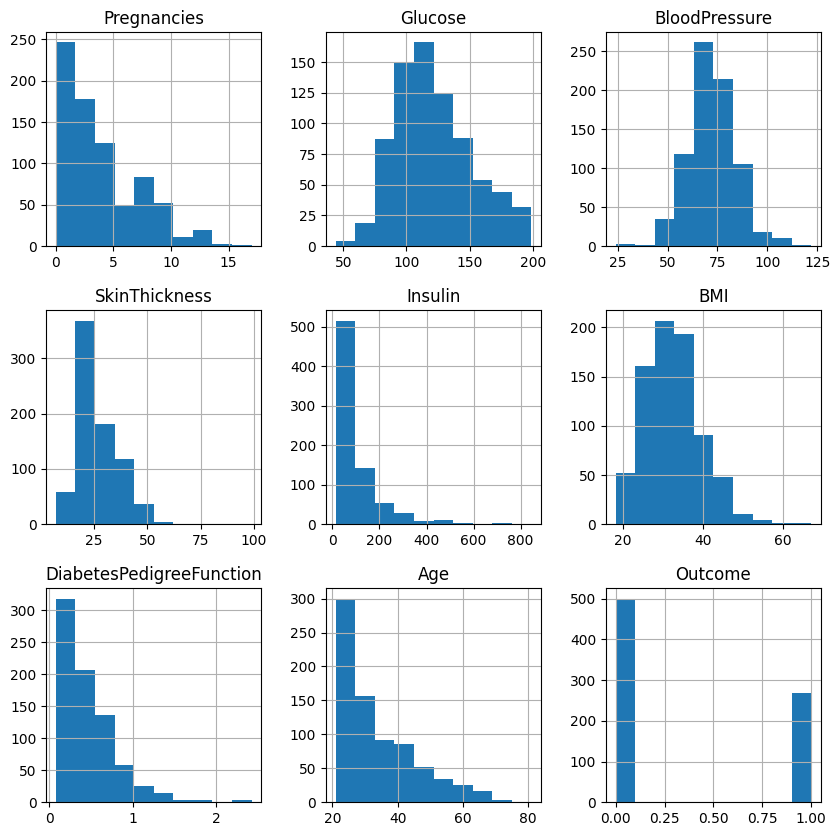

In [ ]:
#4.2 Histograms
diaFrame.hist(bins=10, figsize=(10,10))
plt.show()

In the histplot, we can visualize the skewness of the data in the dataset features. We can also observe the normal distribustion figure with the BMI,Glucose, and BloodPressure.

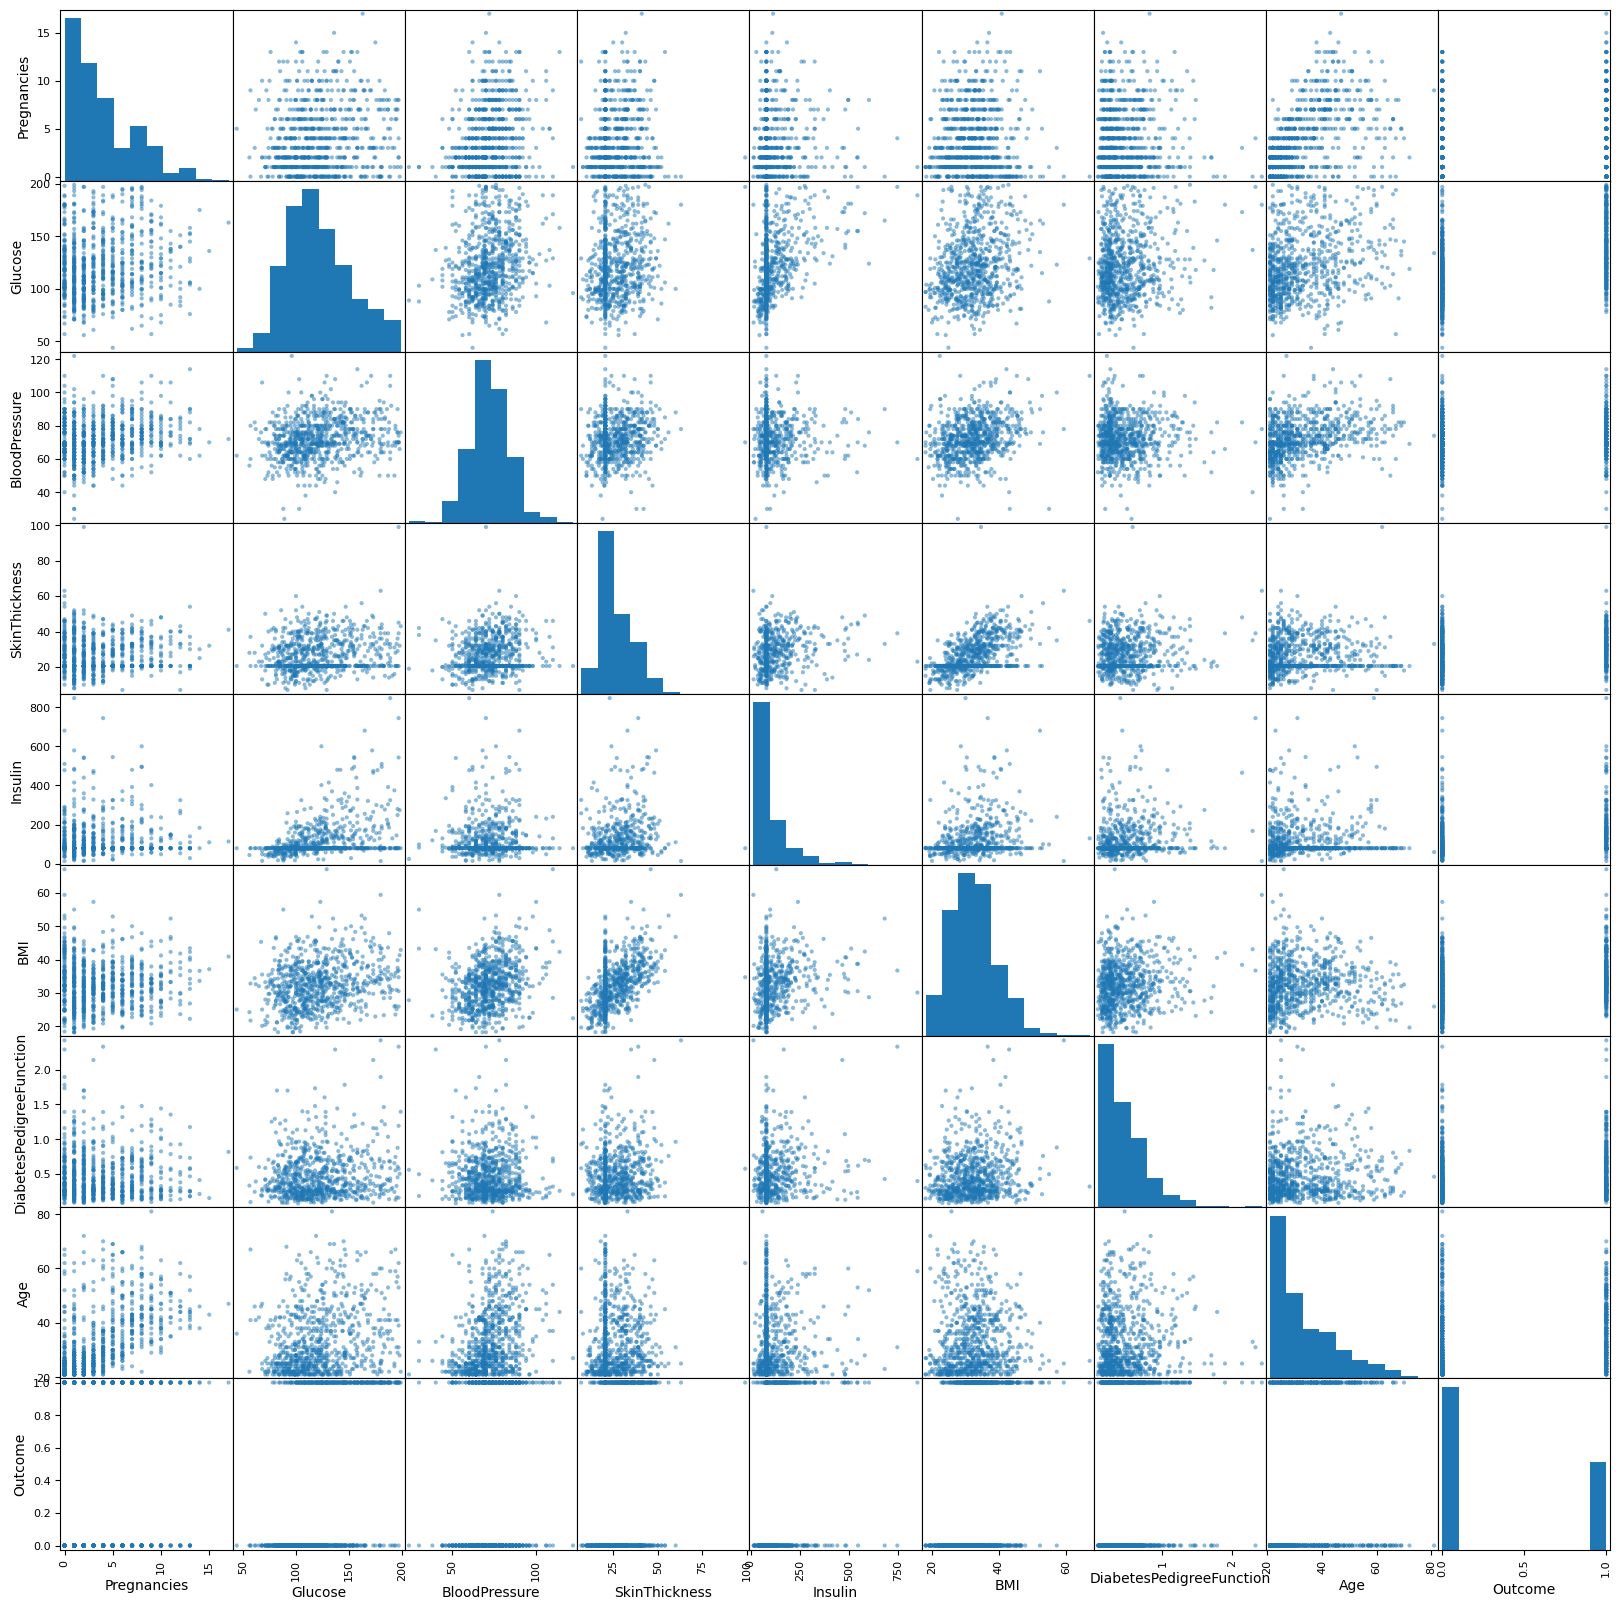

In [ ]:
#4.3 Scatter Plot Matrix
scatter_matrix(diaFrame, figsize = (20,20));

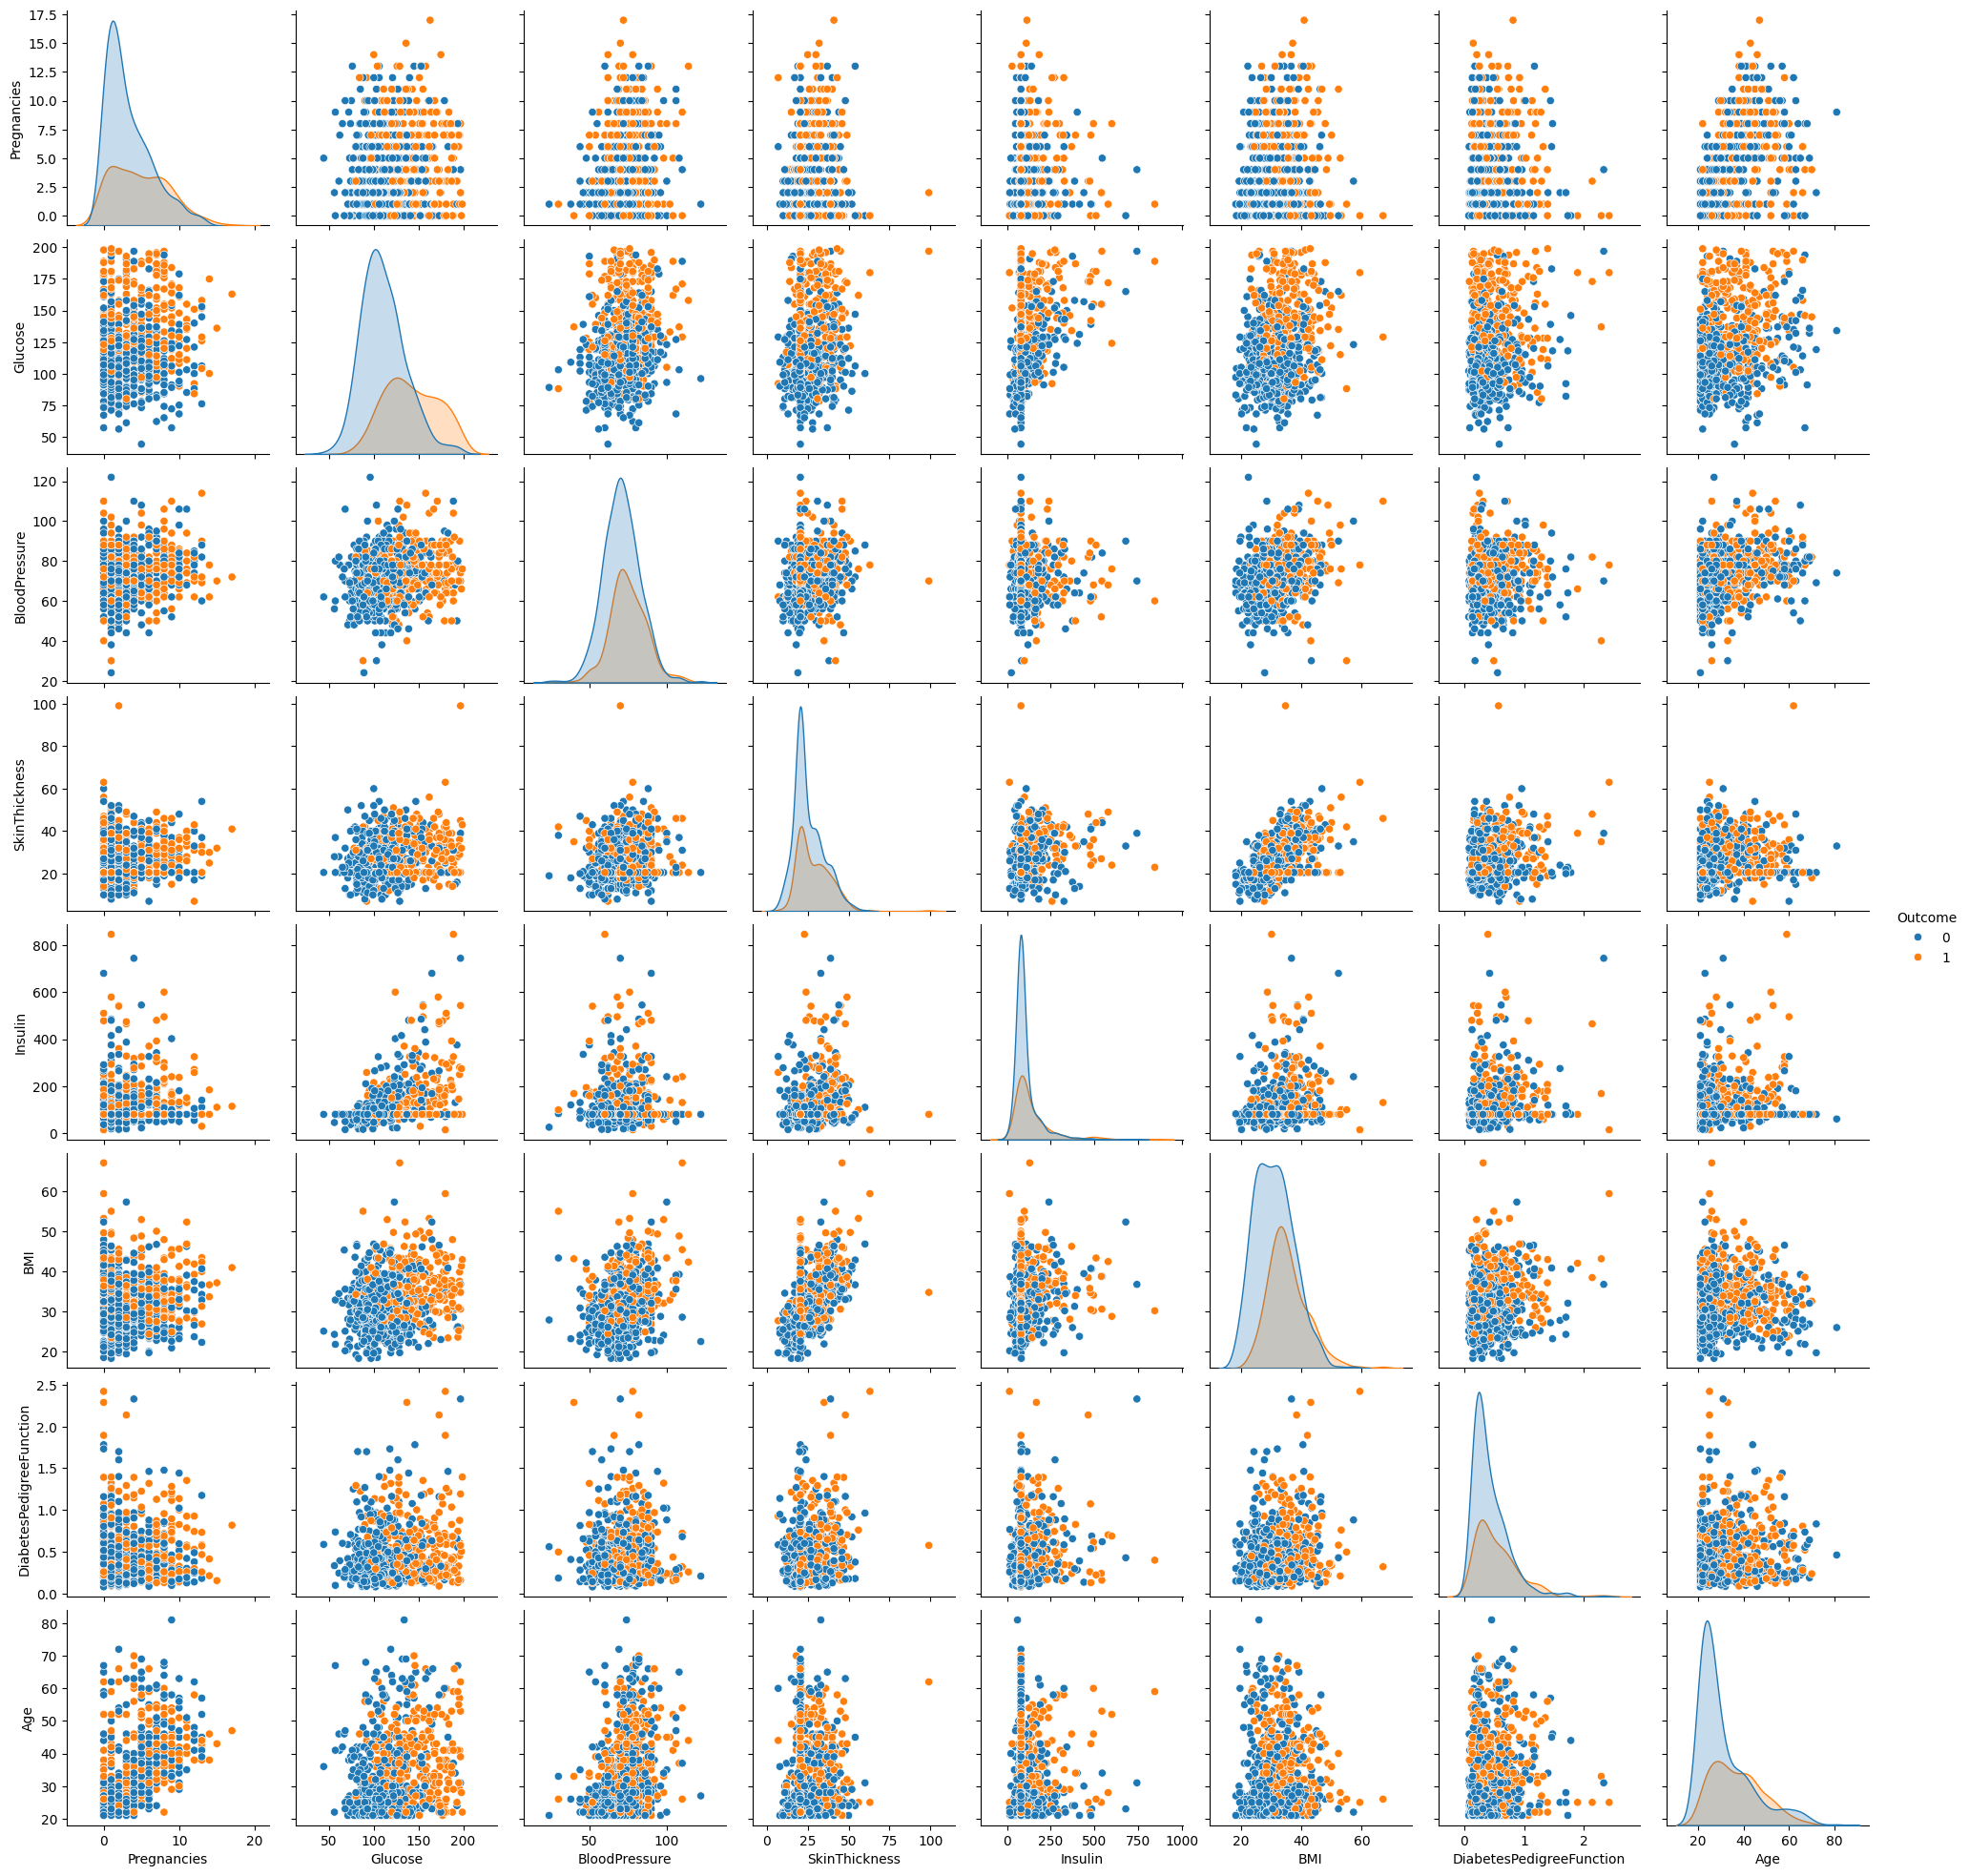

In [ ]:
sns.pairplot(data = diaFrame, hue = 'Outcome')
plt.show()

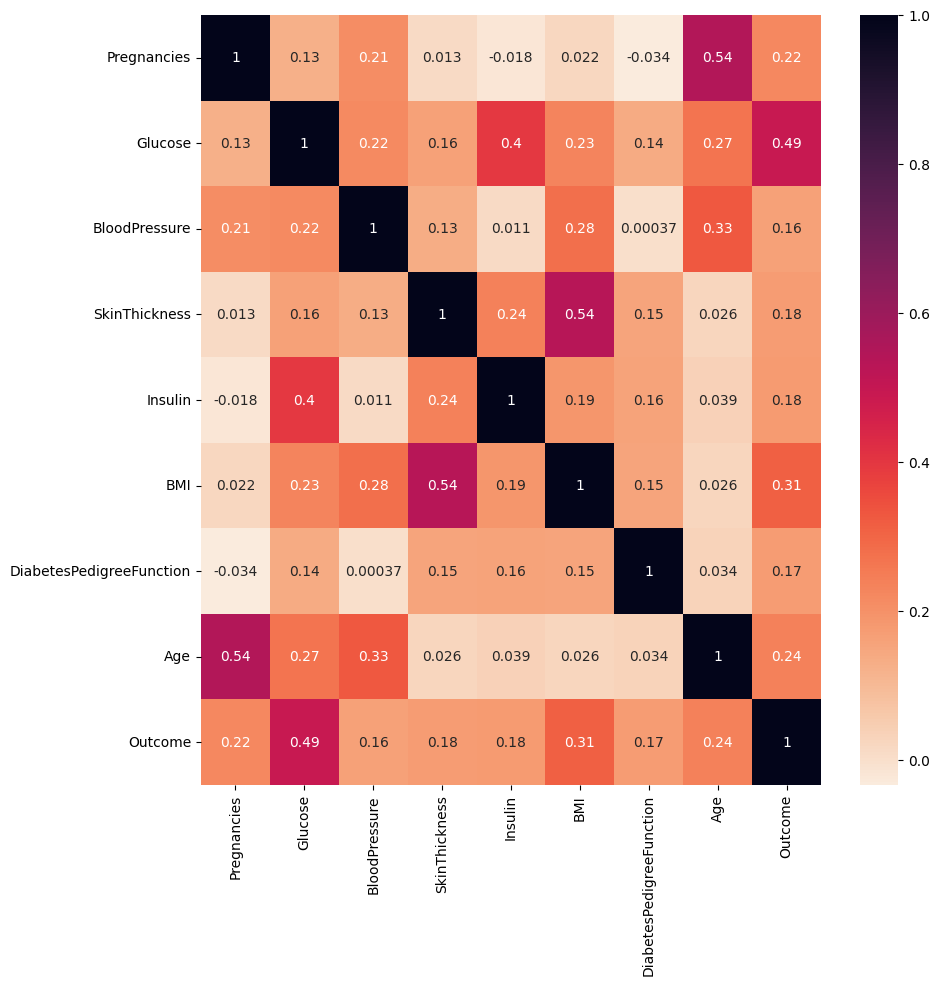

In [ ]:
#4.5 Analyzing relationship between variables
corrD= diaFrame.corr()
top_corr_features = corrD.index
plt.figure(figsize = (10,10))

h = sns.heatmap(diaFrame[top_corr_features].corr(), annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))


In understanding the correlation analysis, we will be evaluating the correlation of the coefficients which will tell you how much one variable changes when the other one does. With the correlation output of the heatmap, we can see that there's a high correlation between 'Outcome' and the features 'Pregnancies', 'Glucose', 'BMI', and 'Age'. Therefore, we can use these features for prediction.


In [ ]:
# Step 5: Splitting the dataframe to X & y

selected_feature = 'Outcome'
y = diaFrame[selected_feature]
X = diaFrame.drop(selected_feature, axis=1)

This codes removed the 'Outcome' Feature from the columns because we will be using the 'Outcome' as our independent variable and our remaining features as the dependent variable.

In [ ]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Above, we just checked if the columns were successfully separated.

In [ ]:
#Step 6: Apply Feature Scaling
#Applied Standard Scaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [ ]:
#Step 7: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size = 0.3, random_state = 25)

In the code above, we have splitted the train and test variables. Where we have divided the data into 70% for training and 30% for testing.



In [ ]:
X_train.shape, y_train.shape

((537, 8), (537,))

In [ ]:
X_test.shape, y_test.shape

((231, 8), (231,))

In the code above, we can see that the value of the train data is 537 while the test data is 231. That is the 70/30 ratio of the data.

## Step 8: Building the Classification Algorithms

---
---
# 4. Logistic Regression
---
---

In [ ]:
#Step 8.1: Building the Logistic Regression
LogReg = LogisticRegression(solver='liblinear', multi_class='ovr')
LogReg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
# Prediction test using log reg
LogReg_prediction=LogReg.predict(X_test)

In [ ]:
X_test.shape

(231, 8)

In [ ]:
#Making Prediction for Logistic Regression
LogReg_prediction.shape

(231,)

231 is the 30% of the given data set. Which is what we implemented in the code earlier on step 7 "test_size = 0.3"

In [75]:
#Model Evaluation using Logictic Regression
print("Train Accuracy of Logistic Regression", LogReg.score(X_train, y_train)*100)
print("Accuracy (Test) score of Logistic Regression", LogReg.score(X_test, y_test)*100)
print("Accuracy (Test) score of Logistic Regression", accuracy_score(y_test, LogReg_prediction)*100)

Train Accuracy of Logistic Regression 75.97765363128491
Accuracy (Test) score of Logistic Regression 81.81818181818183
Accuracy (Test) score of Logistic Regression 81.81818181818183


In [ ]:
X#Confusion Matrix for Logistic Regression
LogRegCM = confusion_matrix(y_test,LogReg_prediction)
LogRegCM

array([[141,  19],
       [ 23,  48]])

<Axes: >

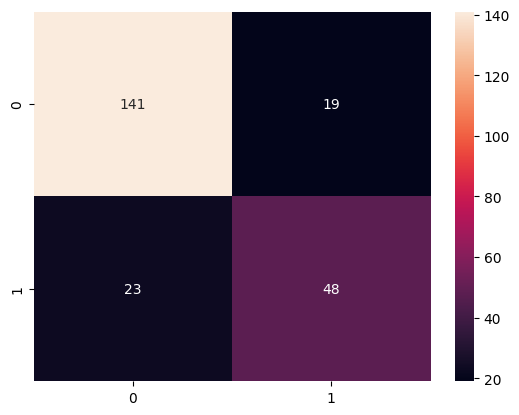

In [ ]:
sns.heatmap(confusion_matrix(y_test, LogReg_prediction), annot=True, fmt="d")

In [ ]:
print('Classification Report of Logistic Regression: \n', classification_report(y_test, LogReg_prediction, digits=3))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0      0.860     0.881     0.870       160
           1      0.716     0.676     0.696        71

    accuracy                          0.818       231
   macro avg      0.788     0.779     0.783       231
weighted avg      0.816     0.818     0.817       231



Logistic Model Evaluation

* Logistic regression is the perfect model to be used in diabetes dataset as it achieved a great level of performance in predicting the diabetes outcome based on the features.
* The evaluation metrics such as accuraccy (over-all correctness of prediction), precision(measures the ratio of true positive predictions to the total number of positive predictions made by the model), recall(known as sensitivity, gauges the ability of the model to correctly identify positive instances out of all actual positives), and F1-score (provides a balance between precision and recall, offering a single metric to assess the model's performance) were utilized in assessing the effectiveness of the model.
* Age, BMI, Pregnancy, and Glucose, were found to be the most influential factors in predicting diabetes.
* But still there is a limitation in this model, such as its reliance in linear decision boundaries and assumptions of feature independence


---
---
# 5. Decision Tree
---
---

In [ ]:
#Step 8.2 Building the Decision Tree
DecTre = DecisionTreeClassifier()
DecTre.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Making Prediction for Decision Tree
DecTre_prediction = DecTre.predict(X_test)

In [76]:
#Model Evaluation using Decision Tree
print("Train Accuracy of Decision Tree", DecTre.score(X_train, y_train)*100)
print("Accuracy (Test) score of Decision Tree", DecTre.score(X_test, y_test)*100)
print("Accuracy (Test) score of Decision Tree", accuracy_score(y_test, DecTre_prediction)*100)

Train Accuracy of Decision Tree 100.0
Accuracy (Test) score of Decision Tree 70.12987012987013
Accuracy (Test) score of Decision Tree 70.12987012987013


In [ ]:
#Confusion Matrix for Decision Tree
DecTreCM = confusion_matrix(y_test,DecTre_prediction)
DecTreCM

array([[123,  37],
       [ 32,  39]])

<Axes: >

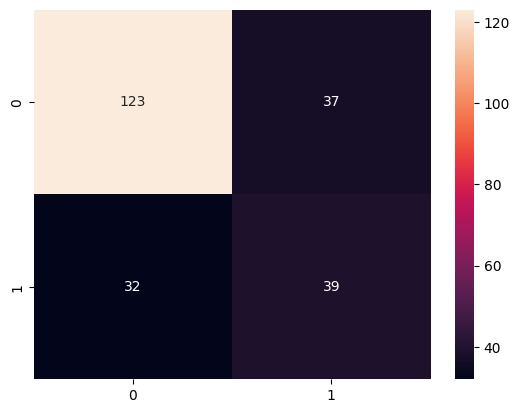

In [ ]:
sns.heatmap(confusion_matrix(y_test, DecTre_prediction), annot=True, fmt="d")

In [ ]:
#checking prediction value
DecTre.predict([[8,127,34,75,0.11,78.2,0.147,60]])


array([1])

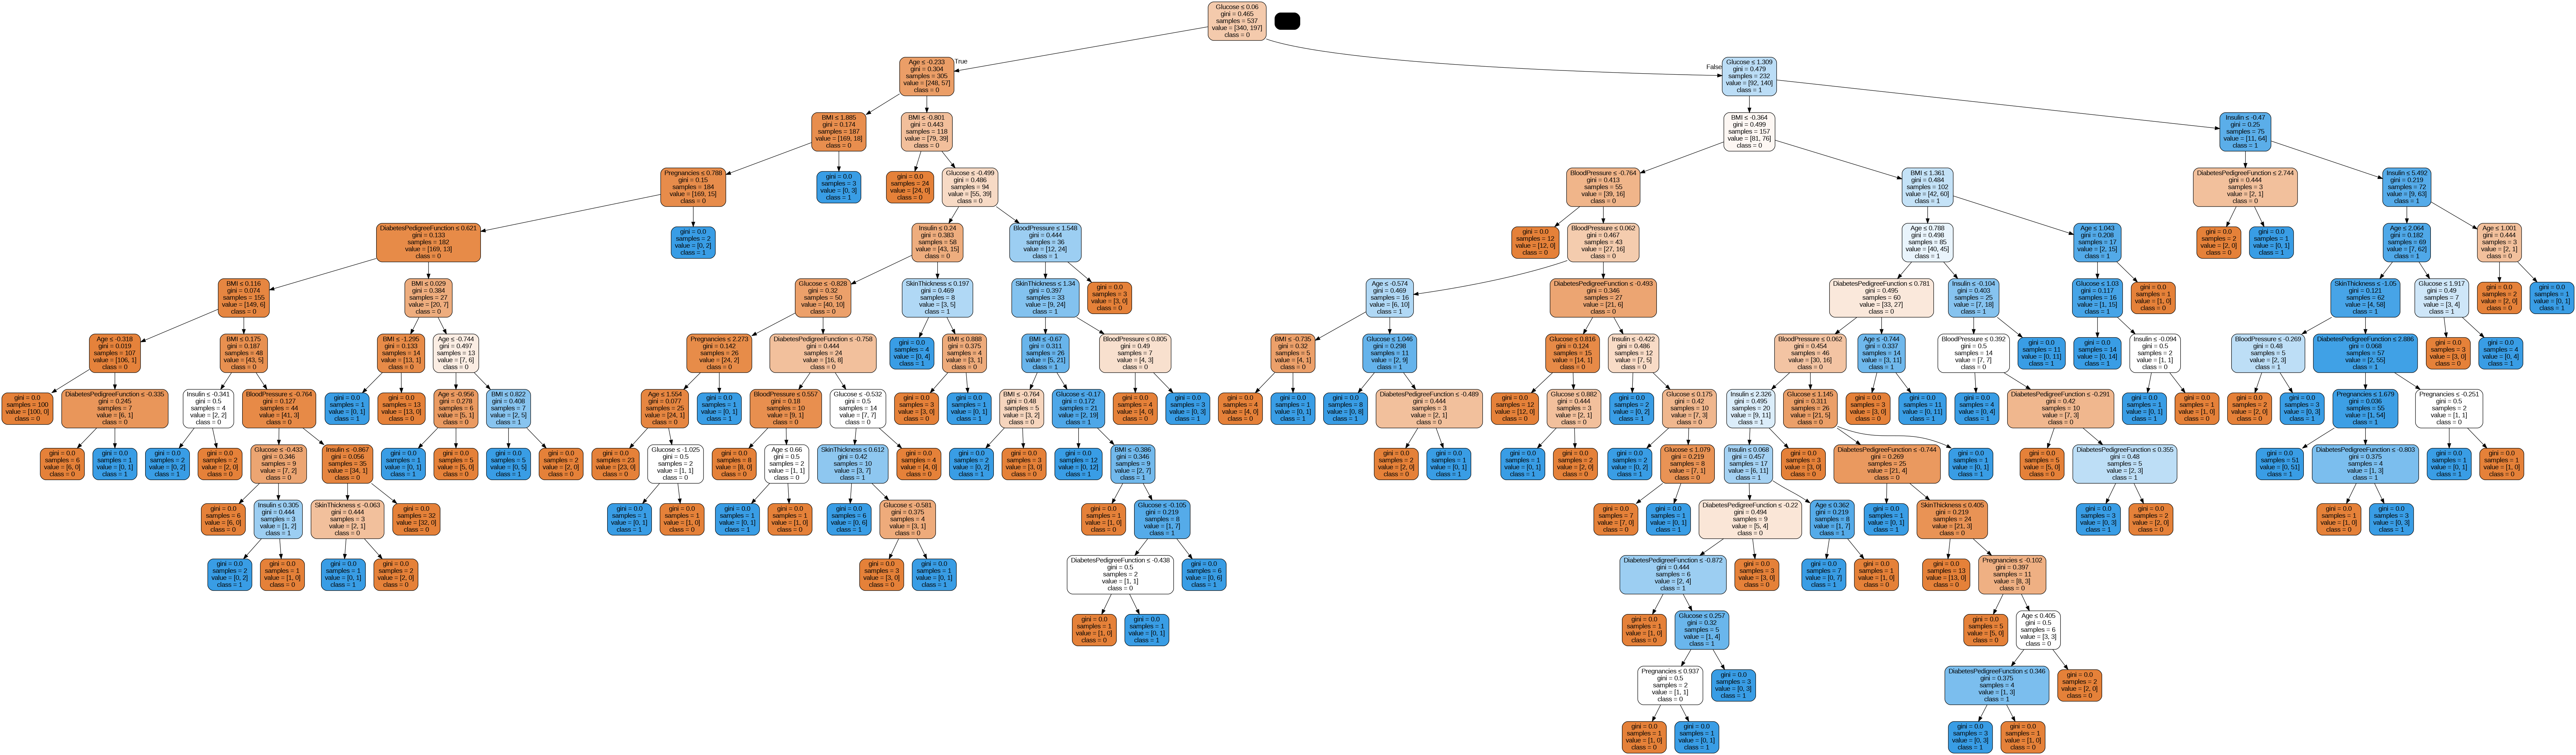

In [ ]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
features = X.columns
dot_data = StringIO()
export_graphviz(DecTre, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [ ]:
print('Classification Report of Decision Tree: \n', classification_report(y_test, DecTre_prediction, digits=3))

Classification Report of Decision Tree: 
               precision    recall  f1-score   support

           0      0.794     0.769     0.781       160
           1      0.513     0.549     0.531        71

    accuracy                          0.701       231
   macro avg      0.653     0.659     0.656       231
weighted avg      0.707     0.701     0.704       231



The set of codes above visualizes a decision tree model trained on diabetes data using scikit-learn. It also saves the tree as an image named 'diabetes_set.png'. We observed that the decision tree picks up every factors that can be deduced in a dataset. It continuously splits up in a way of presenting different decisions and possible outcomes until it reaches the edges where the answers can be observed.


**Decision Tree Model Evaluation**

* As we performed Decision tree regression on the diabetes dataset, it is observed to utilize predicting the diabetes outcome based on the features.  
* Same as the Logistic Regression, The evaluation metrics such as accuracy (over-all correctness of prediction), precision(measures the ratio of true positive predictions to the total number of positive predictions made by the model), recall(known as sensitivity, gauges the ability of the model to correctly identify positive instances out of all actual positives), and F1-score (provides a balance between precision and recall, offering a single metric to assess the model's performance) were utilized in assessing the effectiveness of the model.

* The tree regression offers interpretability because it generates a tree-like structure where each node represents a decision based on a feature, making it very intuitive to understand the predictive process.

* But one limitation of Decision tree regression is that it is prone to overfitting, especially with complex tree structures and noisy data.


---
---
# 6. Random Forest
---
---

In [ ]:
#Step 8.3 Building the random Forest
Ran_For = RandomForestClassifier(criterion = 'entropy')
Ran_For.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#Making Prediction for Random Forest
RanFor_prediction = Ran_For.predict(X_test)

In [ ]:
#Model Evaluation using Logictic Regression
print("Train Accuracy of Random Forest", Ran_For.score(X_train, y_train)*100)
print("Accuracy (Test) score of Random Forest", Ran_For.score(X_test, y_test)*100)
print("Accuracy (Test) score of Random Forest", accuracy_score(y_test, RanFor_prediction)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 81.38528138528139
Accuracy (Test) score of Random Forest 81.38528138528139


In [ ]:
#Confusion Matrix for Logistic Regression
Ran_ForCM = confusion_matrix(y_test,RanFor_prediction)
Ran_ForCM

array([[136,  24],
       [ 19,  52]])

<Axes: >

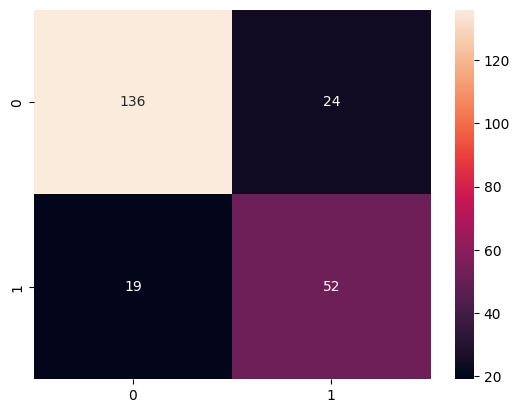

In [ ]:
sns.heatmap(confusion_matrix(y_test, RanFor_prediction), annot=True, fmt="d")

In [ ]:
print('Classification Report of Random Forest: \n', classification_report(y_test, RanFor_prediction, digits=3))

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0      0.877     0.850     0.863       160
           1      0.684     0.732     0.707        71

    accuracy                          0.814       231
   macro avg      0.781     0.791     0.785       231
weighted avg      0.818     0.814     0.816       231



**Random Forest Model Evaluation**

* As we performed Random Forest Regression, we have noticed a high level of accuracy in making predictions.
* It has 80% of accuracy while the decision tree has 79% on the test dataset.
* We have employed confusion matrix which provided insights on the model's performance across different classes. It can also classify instances into relevant diabetes outcome categories.
* This model mitigates overfitting and variance issues often associated with individual decision trees, which leads to improved generalization and predictive accuracy.
* But despite of the advantages, this regression may still face challenges such as model interpretability and computational complexity.

---